# Train and Visualize regression tree

![linear regression](https://images.unsplash.com/photo-1520262454473-a1a82276a574?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1170&q=80)

photo by [Fabrice Villard](https://unsplash.com/@fabulu75) at [Unsplash](https://unsplash.com/)

## Introduction

this is the companion colab code for my tutorial in medium about Train and Visualize regression tree in Python , please read the article for better understanding of the code. In the article I discuss about the theory, the libraries and how efficiently use. Here I am providing just generic information about the algorithms and the code. 
this is a colab notebook, you can test in colab (all the code has been tested and you do not need to set your machine)

[Medium article about Train and Visualize regression tree](https://)



note: the articles will be publish soon

for other stories check my medium profile:
[Salvatore Raieli](https://salvatore-raieli.medium.com/)

## A simple example

Here I will show how the algorithm works under the hood, showing with some simple variables how the algorithm works (the steps that are done when you are using a regression decision tree). Check the article for a more in depth explanation.

We are:
* Importing the libraries
* Create the simplest dataset
* Plot it
* Calculate MSE for single split in a node
* Generate a Tree
* Plot the partitions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 

In [2]:
#create two arbitrary variables
df = pd.DataFrame(columns = ["x", "y"])
df["x"] = [i for i in range(15)]
df["y"] = [1.8, 2.0, 2.2, 2.0, 1.8, 8.5, 8.6, 8.7, 8.4, 8.5, 4.1, 4.3, 4.5, 4.4, 4.3, ]
df

,x,y
0,0,1.8
1,1,2.0
2,2,2.2
3,3,2.0
4,4,1.8
5,5,8.5
6,6,8.6
7,7,8.7
8,8,8.4
9,9,8.5


Text(0, 0.5, 'y target variable')

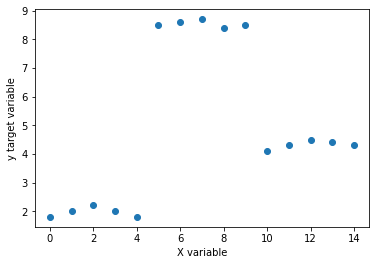

In [3]:
#plot it
plt.scatter(df["x"],df["y"])
plt.xlabel("X variable")
plt.ylabel("y target variable")

In [4]:
def MSE(y = None, y_hat = None, avg = True ):
    """ Mean Square Error """
    y = np.array(y)
    y_hat = np.array(y_hat)
    #calculate the squared error
    err = [(y[i] - y_hat[i])**2 for i in range(len(y)) ]
    #calculate the mean
    if avg == True:
        err = np.sum(err)/len(y)
    return err

In [5]:
# select the split point (we start from the first couple)
#we sum and divide
val = (df.iloc[0,1] + df.iloc[1,1])/2
#calculate the prediction, we take the average of the two group
y_1 = np.mean(df.iloc[:1,1])
y_2 = np.mean(df.iloc[1:,1])
#calculate the MSE for left and right
y_left = df.iloc[:1,1].tolist()
y_hat_left = [y_1 for i in range(len(y_left))]
left_MSE = MSE(y_left, y_hat_left)
y_right = df.iloc[:1,1].tolist()
y_hat_right = [y_2 for i in range(len(y_left))]
right_MSE = MSE(y_right, y_hat_right)
left_MSE, right_MSE

(0.0, 11.318418367346936)

[Text(133.92000000000002, 181.2, 'X[0] <= 4.5\nsquared_error = 7.425\nsamples = 15\nvalue = 4.94'),
 Text(66.96000000000001, 108.72, 'squared_error = 0.022\nsamples = 5\nvalue = 1.96'),
 Text(200.88000000000002, 108.72, 'X[0] <= 9.5\nsquared_error = 4.466\nsamples = 10\nvalue = 6.43'),
 Text(133.92000000000002, 36.23999999999998, 'squared_error = 0.01\nsamples = 5\nvalue = 8.54'),
 Text(267.84000000000003, 36.23999999999998, 'squared_error = 0.018\nsamples = 5\nvalue = 4.32')]

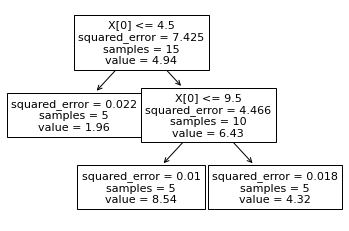

In [6]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
tree = DecisionTreeRegressor(random_state=0, max_depth = 2, min_samples_leaf = 3)
tree.fit(np.array(df["x"]).reshape(-1, 1),df["y"])
plot_tree(tree)

Text(0, 0.5, 'y target variable')

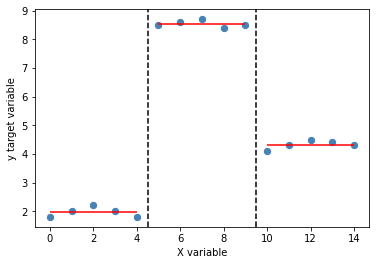

In [7]:
plt.scatter(df["x"], df["y"], c='steelblue',                 
            edgecolor='white', s=70)
#plotting the split points
plt.hlines(y=1.96, xmin=0.0, xmax=4.0, color='r') 
plt.hlines(y=8.54, xmin=5.0, xmax=9.0, color='r')
plt.hlines(y= 4.32, xmin=10.0, xmax=14.0, color='r')
#the line represent the prediction (y hat)
plt.axvline(x=4.5, linestyle = '--', color = "black")
plt.axvline(x=9.5, linestyle ='--',  color = "black")
plt.xlabel("X variable")
plt.ylabel("y target variable")

## An example with real dataset

we are using now the boston dataset for testing the regression decision tree. Again, we will start simple using two variables for testing and showing the results, than we will use all the variables in the dataset (we will use split in training and test set)

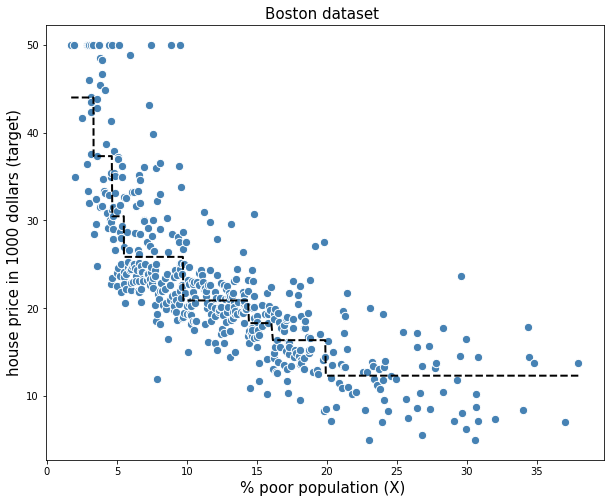

In [8]:
#boston dataset
data_dir = "https://raw.githubusercontent.com/SalvatoreRa/tutorial/main/datasets/Boston.csv"
df = pd.read_csv(data_dir, index_col=0)
#select one variable and the target variable
X = np.array(df[["lstat"]])            
y = df['medv'].values 
#we have to sort to plot it
sorted_idx = X.flatten().argsort()                 
X = X[sorted_idx]
y = y[sorted_idx]
#fit thr regression treen
tree = DecisionTreeRegressor(criterion='mse', max_depth=3)         
tree.fit(X, y)
#plotting the results
plt.figure(figsize=(10, 8))
plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
plt.plot(X, tree.predict(X), color='black', lw=2, linestyle = '--')
plt.xlabel('% poor population (X) ', size = 15)
plt.ylabel('house price in 1000 dollars (target)', size = 15)
plt.title('Boston dataset ', size = 15)
plt.show()

In [9]:
data_dir = "https://raw.githubusercontent.com/SalvatoreRa/tutorial/main/datasets/Boston.csv"
df = pd.read_csv(data_dir, index_col=0,)
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [10]:
from sklearn.model_selection import train_test_split
#separing the input features from the target variable
y = df["medv"]
X = df.drop(["medv"], axis=1)
#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size = 0.2, #test size would be 20%
                                                        random_state = 42 #42 is for good luck!
                                                        ) 

[Text(279.0, 475.65000000000003, 'rm <= 6.941\nmse = 86.873\nsamples = 404\nvalue = 22.797'),
 Text(139.5, 339.75, 'lstat <= 14.4\nmse = 40.321\nsamples = 337\nvalue = 19.947'),
 Text(69.75, 203.85000000000002, 'dis <= 1.385\nmse = 25.693\nsamples = 203\nvalue = 23.325'),
 Text(34.875, 67.94999999999999, 'mse = 91.577\nsamples = 4\nvalue = 44.475'),
 Text(104.625, 67.94999999999999, 'mse = 15.197\nsamples = 199\nvalue = 22.899'),
 Text(209.25, 203.85000000000002, 'crim <= 6.926\nmse = 19.005\nsamples = 134\nvalue = 14.829'),
 Text(174.375, 67.94999999999999, 'mse = 10.401\nsamples = 76\nvalue = 17.062'),
 Text(244.125, 67.94999999999999, 'mse = 15.188\nsamples = 58\nvalue = 11.903'),
 Text(418.5, 339.75, 'rm <= 7.437\nmse = 74.684\nsamples = 67\nvalue = 37.131'),
 Text(348.75, 203.85000000000002, 'nox <= 0.659\nmse = 38.306\nsamples = 41\nvalue = 32.363'),
 Text(313.875, 67.94999999999999, 'mse = 21.586\nsamples = 39\nvalue = 33.3'),
 Text(383.625, 67.94999999999999, 'mse = 13.69\nsamp

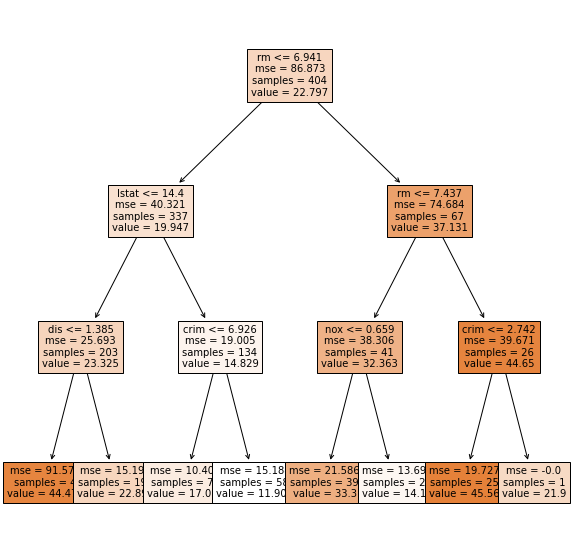

In [11]:
#let's plot our tree
tree = DecisionTreeRegressor(criterion='mse', max_depth=3) 
tree.fit(X_train, y_train)
fig = plt.figure(figsize = (10,10))
plot_tree(tree,
          feature_names = df.columns,
          fontsize = 10,
          filled=True)
       

## Regression report

Instead to check different **regression metrics** using the scikit-learn version, I wrote a function that is exactly doing this. Why I did it? because there is a  [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) but not a regression report (nothing that I am aware of). 

The idea is that I would like a simple function that is printing all the metrics in a nice way and also it is returning a dataframe (in case I want to save it). I defined all the function using Numpy and pandas in the simplest way, you can check the code. 

The script is present in the **utility** folder in my GitHub, and here I show how to import.

In [12]:
import sys
import os

user = "SalvatoreRa"
repo = "tutorial"
src_dir = "machine%20learning/utility/"
pyfile = "regression_report.py" #here the name of the file py

url = f"https://raw.githubusercontent.com/{user}/{repo}/main/{src_dir}/{pyfile}"
!wget --no-cache --backups=1 {url}
#copy here the link of the file
py_file_location = "https://github.com/SalvatoreRa/tutorial/blob/main/machine%20learning/utility/regression_report.py"
sys.path.append(os.path.abspath(py_file_location))
#here the importing
from regression_report import regression_report

--2022-01-09 12:54:32--  https://raw.githubusercontent.com/SalvatoreRa/tutorial/main/machine%20learning/utility//regression_report.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /SalvatoreRa/tutorial/main/machine%20learning/utility/regression_report.py [following]
--2022-01-09 12:54:32--  https://raw.githubusercontent.com/SalvatoreRa/tutorial/main/machine%20learning/utility/regression_report.py
Reusing existing connection to raw.githubusercontent.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 6229 (6.1K) [text/plain]
Saving to: ‘regression_report.py’

regression_report.p 100%[===================>]   6.08K  --.-KB/s    in 0s      

2022-01-09 12:54:32 (55.3 MB/s) - ‘regression_report.py’ saved [6229/6229]



In [13]:
pred = tree.predict(X_test)
_ = regression_report(test_set = X_test, target = y_test, predictions = pred )

                           Metric  Acronym   Value
0               Mean Square Error      MAE  13.491
1          Root Mean Square Error     RMSE   3.673
2                       Max Error  max_err  10.062
3             Mean Absolute Error      MAE   3.007
4  Mean squared logarithmic error     MSLE   0.040
5  Mean Absolute Percentage Error     MAPE   0.171
6                       R squared       R2   0.816
7              adjusted R squared   adj_R2   0.789
8         Normalized RMSE (range)    NRMSE   0.082
9      Normalized RMSE (quartile)    NRMSE   0.528


## A prettier visualization

I will show here how to use [dtreeviz](https://github.com/parrt/dtreeviz) for visualize regression tree

In [27]:
#to install in colab
import sys

if 'google.colab' in sys.modules:
  !pip install -q dtreeviz

import sys
import os
# add library module to PYTHONPATH
sys.path.append(f"{os.getcwd()}/../")


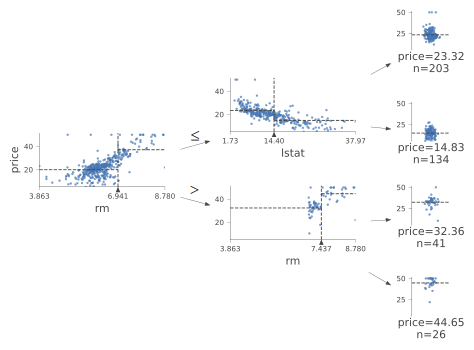

<Figure size 1080x576 with 0 Axes>

In [28]:
#visualize the tree
from dtreeviz.trees import *
import graphviz
from IPython.display import Image, display_svg, SVG

tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X_train, y_train)
fig = plt.figure(figsize = (15,8))
viz = dtreeviz(tree,
               X_train,
               y_train,
               target_name='price',
               feature_names=X.columns,
               orientation = "LR",
               scale = 1.2)
              
viz 

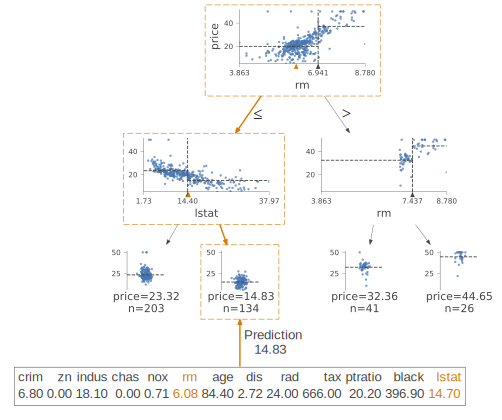

In [29]:
# the prediction path, we are using here a random observation
#random selection from the training 
n = np.random.randint(0, len(X_train))
obs = X_train.iloc[n,:]  
viz = dtreeviz(tree,
               X_train,
               y_train,
               target_name='price',
               feature_names=X.columns,
               X = obs,
               scale = 1.2)
           
viz 

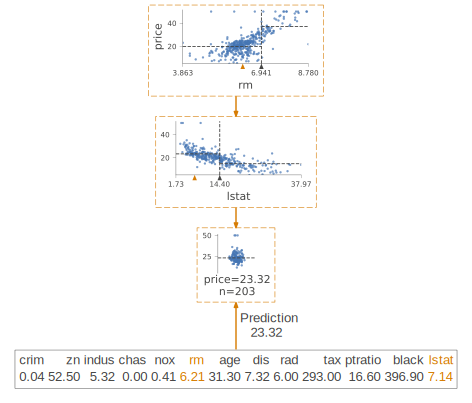

In [30]:
#random selection from the training 
n = np.random.randint(0, len(X_train))
obs = X_train.iloc[n,:]  
#we visualize only the prediction path
viz = dtreeviz(tree,
               X_train,
               y_train,
               target_name='price',
               feature_names=X.columns,
               X = obs,
               show_just_path=True,     
               scale = 1.2)
              
viz 

In [31]:
#printing in plain english
print(obs)
print("prediction explanation")
print(explain_prediction_path(tree, obs, feature_names=X.columns, 
                              explanation_type="plain_english"))

crim         0.03871
zn          52.50000
indus        5.32000
chas         0.00000
nox          0.40500
rm           6.20900
age         31.30000
dis          7.31720
rad          6.00000
tax        293.00000
ptratio     16.60000
black      396.90000
lstat        7.14000
Name: 288, dtype: float64
prediction explanation
rm < 6.94
lstat < 14.4



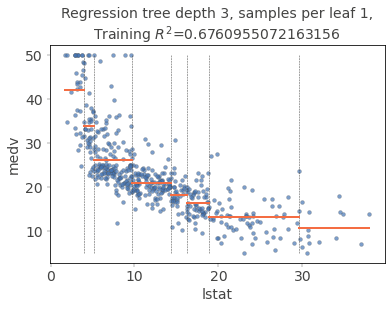

In [32]:
#plot the partition
X, y = df[['lstat']], df['medv']

dt = DecisionTreeRegressor(max_depth=3, criterion="mae")
dt.fit(X, y)

fig = plt.figure()
ax = fig.gca()
rtreeviz_univar(dt, X, y, 'lstat', 'medv', ax=ax)
plt.show()